# <center>AISC AISC2003 - Advanced Analytics 01 (Group 1)</center>
----------------------------------------------------------------------
## Case Study 1 Presentation + Viva
### <p text-align="right"> - Prof. Qasim Ali</p>
----------------------------------------------------------------------
#### Group name: PHNJK
>1. Pratik Domadiya (500199494)
>2. Hani Desai(500195336)
>3. Nishi Agrawal(500199806)
>4. Jaydeep Bhalala(500198056)
>5. Keval Padsala(500199506)

### Background: 

Uber Technologies, Inc. is an American multinational transportation network company based in San Francisco and has operations in over 785 metropolitan areas worldwide with over 110 million users worldwide. Ridesharing is a very volatile market and demand fluctuates wildly with time, place, weather, local events, etc. The key to being successful in this business is to be able to detect patterns in these fluctuations and cater to the demand at any given time. As a newly hired Junior Data Scientist in Uber’s New York Office, you have been given the task of extracting insights from data that will help the business grow. Good insights are ones which are actionable and make business sense.



### Objective: 

To extract actionable insights that will enable growth in the market



### Key Questions:

1. What are the different variables that influence pickups?

2. Which factor affects the pickups the most? What could be plausible reasons for that?

3. What are your recommendations to Uber management to capitalize on fluctuating demand?



### Data:

The data contains weather information, location and no. of pickups



* pickup_dt: Date and time of the pick up.

* borough: NYC's borough.

* pickups: Number of pickups for the period.

* spd: Wind speed in miles/hour.

* vsb: Visibility in miles to nearest tenth.

* temp: Temperature in Fahrenheit.

* dewp: Dew point in Fahrenheit.

* slp: Sea level pressure.

* pcp01: 1-hour liquid precipitation.

* pcp06: 6-hour liquid precipitation.

* pcp24: 24-hour liquid precipitation.

* sd: Snow depth in inches.

* hday: Being a holiday (Y) or not (N).

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from datetime import datetime

In [48]:
mcolors.BASE_COLORS #these colors can be called with a single character

{'b': (0, 0, 1),
 'g': (0, 0.5, 0),
 'r': (1, 0, 0),
 'c': (0, 0.75, 0.75),
 'm': (0.75, 0, 0.75),
 'y': (0.75, 0.75, 0),
 'k': (0, 0, 0),
 'w': (1, 1, 1)}

In [3]:
df = pd.read_csv('./Uber.csv')

In [4]:
df.head()

pickup_dt    borough  pickups  spd   vsb  temp  dewp     slp  \
0  2015-01-01 01:00:00      Bronx      152  5.0  10.0  30.0   7.0  1023.5   
1  2015-01-01 01:00:00   Brooklyn     1519  5.0  10.0  30.0   7.0  1023.5   
2  2015-01-01 01:00:00        EWR        0  5.0  10.0  30.0   7.0  1023.5   
3  2015-01-01 01:00:00  Manhattan     5258  5.0  10.0  30.0   7.0  1023.5   
4  2015-01-01 01:00:00     Queens      405  5.0  10.0  30.0   7.0  1023.5   

   pcp01  pcp06  pcp24   sd hday  
0    0.0    0.0    0.0  0.0    Y  
1    0.0    0.0    0.0  0.0    Y  
2    0.0    0.0    0.0  0.0    Y  
3    0.0    0.0    0.0  0.0    Y  
4    0.0    0.0    0.0  0.0    Y

In [5]:
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'])

In [6]:
df.apply(lambda col: col.unique()) #Get all different values from all columns

pickup_dt    [2015-01-01T01:00:00.000000000, 2015-01-01T02:...
borough      [Bronx, Brooklyn, EWR, Manhattan, Queens, Stat...
pickups      [152, 1519, 0, 5258, 405, 6, 4, 120, 1229, 434...
spd          [5.0, 3.0, 10.0, 9.0, 7.0, 0.0, 6.0, 11.0, 8.0...
vsb          [10.0, 5.9, 2.22, 1.2, 1.65, 2.75, 2.7, 2.0, 3...
temp         [30.0, 29.0, 28.0, 27.0, 31.0, 33.0, 35.0, 37....
dewp         [7.0, 6.0, 8.0, 9.0, 10.0, 11.0, 13.0, 15.0, 1...
slp          [1023.5, 1023.0, 1022.3, 1022.0, 1021.8, 1020....
pcp01        [0.0, 0.0075, 0.0233333333333333, 0.0525, 0.06...
pcp06        [0.0, 0.0075, 0.0308333333333333, 0.0833333333...
pcp24        [0.0, 0.0075, 0.0308333333333333, 0.0833333333...
sd           [0.0, 0.0416666666666667, 0.0833333333333333, ...
hday                                                    [Y, N]
dtype: object

In [7]:
df['hday'] = pd.Series(np.where(df.hday.values == 'Y', 1, 0),df.index)

In [8]:
df.describe()

pickups           spd           vsb          temp          dewp  \
count  29101.000000  29101.000000  29101.000000  29101.000000  29101.000000   
mean     490.215903      5.984924      8.818125     47.669042     30.823065   
std      995.649536      3.699007      2.442897     19.814969     21.283444   
min        0.000000      0.000000      0.000000      2.000000    -16.000000   
25%        1.000000      3.000000      9.100000     32.000000     14.000000   
50%       54.000000      6.000000     10.000000     46.000000     30.000000   
75%      449.000000      8.000000     10.000000     64.500000     50.000000   
max     7883.000000     21.000000     10.000000     89.000000     73.000000   

                slp         pcp01         pcp06         pcp24            sd  \
count  29101.000000  29101.000000  29101.000000  29101.000000  29101.000000   
mean    1017.817938      0.003830      0.026129      0.090464      2.529169   
std        7.768796      0.018933      0.093125      0.219402      4.520325   
min      991.400000      0.000000      0.000000      0.000000      0.000000   
25%     1012.500000      0.000000      0.000000      0.000000      0.000000   
50%     1018.200000      0.000000      0.000000      0.000000      0.000000   
75%     1022.900000      0.000000      0.000000      0.050000      2.958333   
max     1043.400000      0.280000      1.240000      2.100000     19.000000   

               hday  
count  29101.000000  
mean       0.038521  
std        0.192454  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pickup_dt  29101 non-null  datetime64[ns]
 1   borough    26058 non-null  object        
 2   pickups    29101 non-null  int64         
 3   spd        29101 non-null  float64       
 4   vsb        29101 non-null  float64       
 5   temp       29101 non-null  float64       
 6   dewp       29101 non-null  float64       
 7   slp        29101 non-null  float64       
 8   pcp01      29101 non-null  float64       
 9   pcp06      29101 non-null  float64       
 10  pcp24      29101 non-null  float64       
 11  sd         29101 non-null  float64       
 12  hday       29101 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 2.9+ MB


In [15]:
from IPython.display import HTML
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='report.html') #Generate ProfileReport using pandas_profiling.
HTML(filename='report.html') #View ProfileReport.

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
np.arange(24)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])

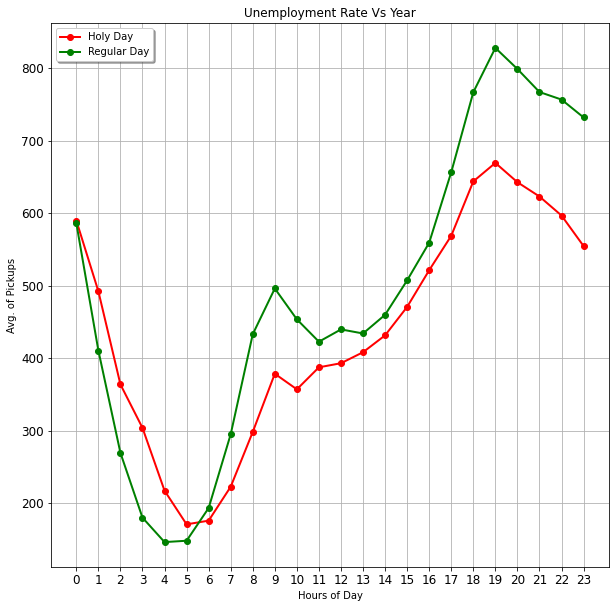

In [69]:
mask = df['hday'].values == 1
mask_df = df[mask]

import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
plt.plot(mask_df.groupby(mask_df['pickup_dt'].dt.hour)["pickups"].mean(), color='red', marker='o', linewidth=2, label="Holy Day")
mask_df = df[~mask]
plt.plot(mask_df.groupby(mask_df['pickup_dt'].dt.hour)["pickups"].mean(), color='green', marker='o', linewidth=2, label="Regular Day")
plt.legend(fancybox=True, shadow=True)

plt.tick_params(axis='x', rotation=0, labelsize=12)
plt.tick_params(axis='y', rotation=0, labelsize=12)
plt.title('Avg. of Pickups per Hour')

plt.xlabel('Hours of Day')
plt.xticks(np.arange(24))

plt.ylabel('Avg. of Pickups')
plt.grid(True)
plt.show()

# mask_df = df[~mask]
# mask_df.groupby(mask_df['pickup_dt'].dt.hour)["pickups"].mean().plot(kind="line",rot=25)

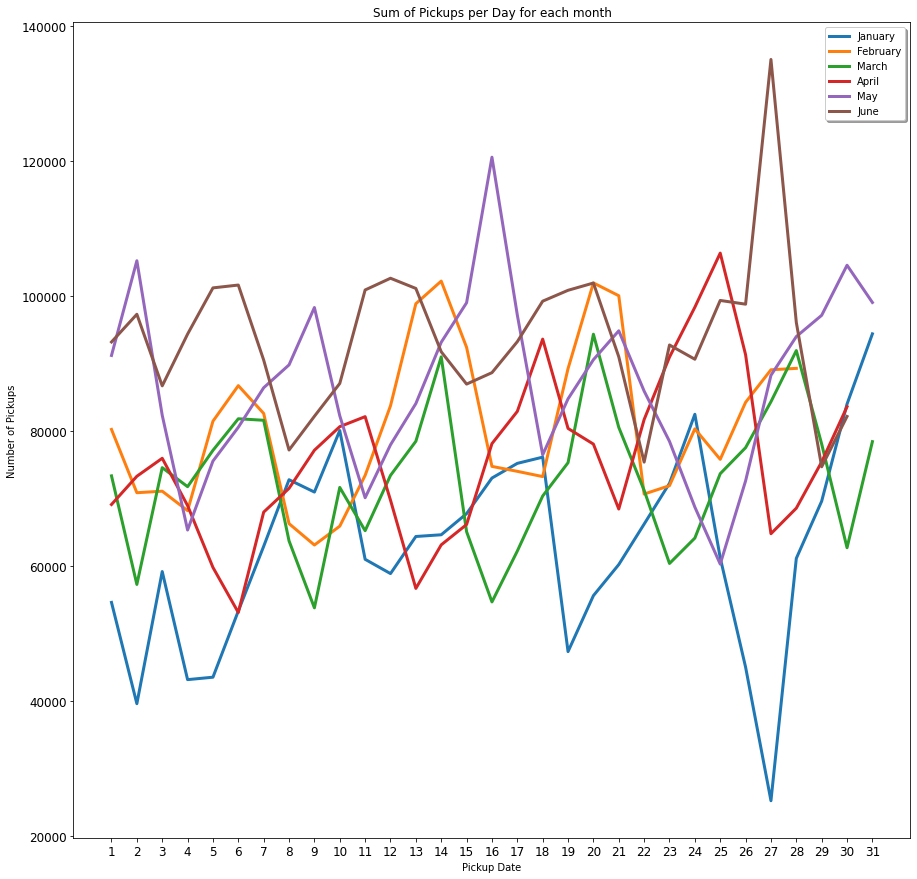

In [115]:
months = df['pickup_dt'].dt.to_period('M').drop_duplicates().to_numpy()
months

plt.figure(figsize = (15,15))

colors = [color for color in mcolors.TABLEAU_COLORS]


for i in range(0, len(months)):
    monthname = datetime.strptime(str(months[i].month), '%m').strftime("%B")
    mask = df['pickup_dt'].dt.to_period('M') == months[i]
    mask_df = df[mask]
    plt.plot(mask_df.groupby(mask_df['pickup_dt'].dt.day)["pickups"].sum(), color=colors[i%len(colors)], linewidth=3, label=monthname)

plt.legend(fancybox=True, shadow=True)
plt.tick_params(axis='x', rotation=0, labelsize=12)
plt.tick_params(axis='y', rotation=0, labelsize=12)
plt.title('Sum of Pickups per Day for each month')

plt.xlabel('Pickup Date')
plt.xticks(np.arange(1,32))

plt.ylabel('Number of Pickups')
plt.show()
    

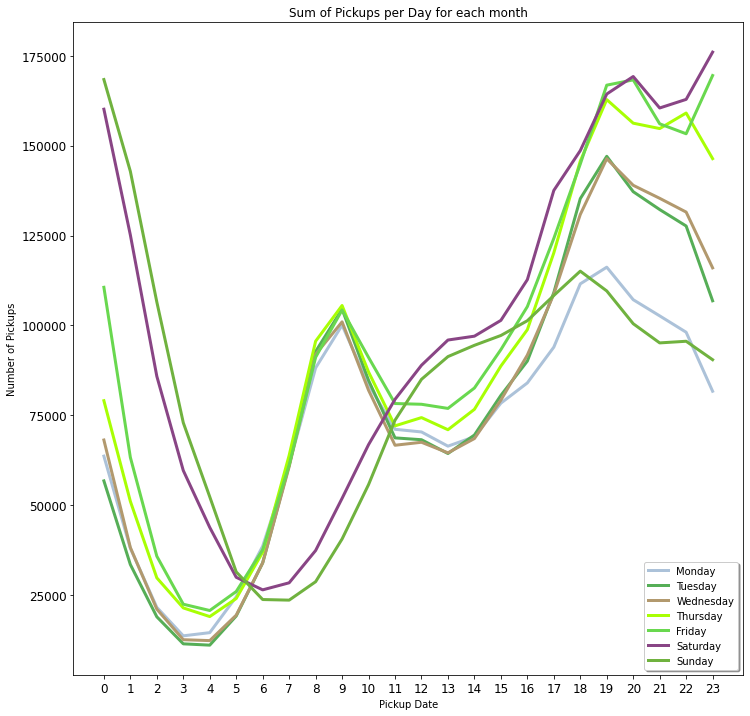

In [119]:
from pandas.api.types import CategoricalDtype
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)

weekdays = df['pickup_dt'].dt.day_name().drop_duplicates().astype(cat_type)

plt.figure(figsize = (12,12))

# mcolors.BASE_COLORS #these colors can be called with a single character
# mcolors.TABLEAU_COLORS #the default color cycle colors
# mcolors.CSS4_COLORS #named colors also recognized in css
# mcolors.XKCD_COLORS #named colors from the xkcd survey
colors = [color for color in mcolors.XKCD_COLORS]

i=0
for weekday in weekdays.sort_values():
    mask = df['pickup_dt'].dt.day_name() == weekday
    mask_df = df[mask]
    plt.plot(mask_df.groupby(mask_df['pickup_dt'].dt.hour)["pickups"].sum(), color=colors[i%len(colors)], linewidth=3, label=weekday)
    i+=1

plt.legend(fancybox=True, shadow=True)
plt.tick_params(axis='x', rotation=0, labelsize=12)
plt.tick_params(axis='y', rotation=0, labelsize=12)
plt.title('Sum of Pickups per Day for each Hour')

plt.xlabel('Pickup Date')
plt.xticks(np.arange(0,24))

plt.ylabel('Number of Pickups')
plt.show()
    

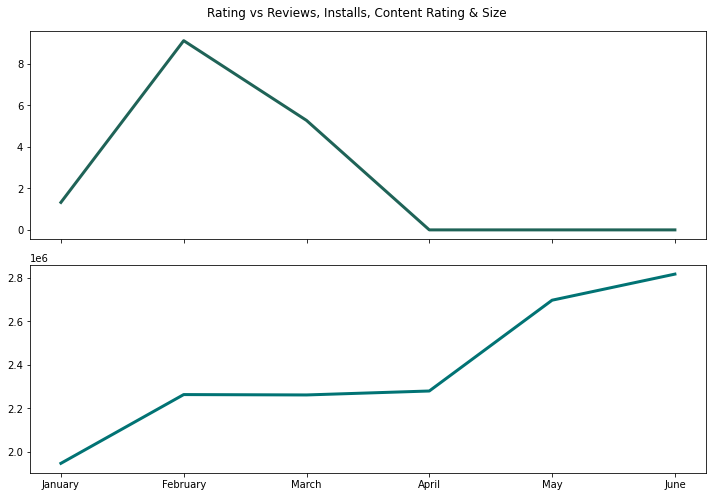

In [208]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,7), sharex=True)
fig.suptitle('Rating vs Reviews, Installs, Content Rating & Size')

new_order = ['January', 'February', 'March', 'April', 'May', 'June']

df.groupby(df['pickup_dt'].dt.strftime('%B'))["sd"].mean().reindex(new_order, axis=0)
i+=1
ax1.plot(df.groupby(df['pickup_dt'].dt.strftime('%B'))["sd"].mean().reindex(new_order, axis=0), color=colors[i%len(colors)], linewidth=3, label="SnowDepth") #Red dotted line --> Rating vs Reviews.
i+=1
ax2.plot(df.groupby(df['pickup_dt'].dt.strftime('%B'))["pickups"].sum().reindex(new_order, axis=0), color=colors[i%len(colors)], linewidth=3, label="Total Pickups") #Black triangle --> graph Rating vs Installs.

fig.tight_layout()
